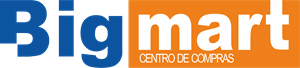

# BIG-MART SALES PREDICTION AND ANALYSIS 
By Hariprasath

## Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

## Aim of this project
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis Generation:

1. #### Hypothesis 1 - Item Visibility Impact:
Null Hypothesis (H0): There is no significant relationship between product visibility and sales.
Alternative Hypothesis (H1): Higher product visibility is associated with increased sales.

2. #### Hypothesis 2 - Item Pricing Impact:
Null Hypothesis (H0): There is no significant relationship between pricing strategy and sales.
Alternative Hypothesis (H1): An optimal pricing strategy within a specific price range positively affects sales.

3. #### Hypothesis 3 - Store Type Impact:
Null Hypothesis (H0): There is no significant difference in sales across different store types.
Alternative Hypothesis (H1): Specific store types have significantly higher sales than others.


# INSTALLING PACKAGES

In [1]:
!pip install pandas
!pip install numpy 
!pip install seaborn
!pip install matplotlib 
!pip install pandas-profiling
!pip install ipywidgets
!pip install klib
!pip install xgboost

# IMPORTING LIBRARIES 

In [2]:
#PRE-PROCESSING
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from ydata_profiling import ProfileReport
import klib

#FEATURE ENGINEERING
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

#MODELING
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#METRICS
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

# PRE-PROCESSING AND DATA ANALYSIS 

In [3]:
#reading csv files as a Dataframe using read.csv function
df_train=pd.read_csv("D:\Technocolabs\Train.csv")
df_test=pd.read_csv("D:\Technocolabs\Test.csv")

In [4]:
#printing first five rows of first dataframe
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
#printing last five rows of second dataframe
df_test.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5676           FDB58         10.5          Regular         0.013496   
5677           FDD47          7.6          Regular         0.142991   
5678           NCO17         10.0          Low Fat         0.073529   
5679           FDJ26         15.3          Regular         0.000000   
5680           FDU37          9.5          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1

In [6]:
#printing the size of each datafrfames
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [7]:
#column information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#column information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [9]:
#a statistical summary
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

# MISSING VALUE

The Missing value treatment is a crucial part of Data analysis.
Processing the data with missing values will eventually end with the occurance of error.

#### Let's identify and rectify the null values if any.

In [10]:
#checking for null values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Through the above information we can see that there are missing values in the following
1.Item_Weight

2.Outlet_Size

In [12]:
#statistical summary of "Item_Weight"
df_train["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

##### Since "Item_Weight" contains numerical value, the missing values can be filled with mean value

In [13]:
#filling mean value in the place of missing values
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)

In [14]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#statistical summary of "Outlet_Size" 
df_train["Outlet_Size"].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

Since "Outlet_Size" contains object values, the missing values can be filled with mode value(most occured value)

In [16]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
df_train["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
df_test["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

##### We can see that Medium occurance is the highest. Let's fill the missing values with the mode value(Medium)

In [19]:
#filling the null values with mode value
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0],inplace=True)

In [20]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# DATA EXPLORATION
#### Let's split our data into numerical and categorical and placing them in seperate lists namely "num" and "cat"

In [23]:
#list of all the numeric columns
num = df_train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df_train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  df_train[num]
#categoric df
BM_cat = df_train[cat]

[df_train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

### We can see there are 5 category in 'Item_Fat_Content' even though it is actually two category namely "Lowfat"&"Regular"
###### Let's replace the duplicate values to just "Low fat"&"Regular"

In [24]:
df_train =  df_train.replace(to_replace ="low fat",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="LF",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="reg",  value ="Regular") 

#### Outlet_Establishment_Year is useless. lets use Outlet_Age to get insight on how sales get affected by overall time period of the store's existence in their respective area

In [25]:
#adding new column "Outlet_Age"
df_train['Outlet_Age'], df_test['Outlet_Age']= df_train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), df_test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

In [26]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0  Supermarket Type1          3735.1380          21  
1  Supermarket Type2           443.4228          11  
2  Supermarket Type1          2097.2700          21  
3      Grocery Store           732.3800          22  
4  Supermarket Type1           994.7052          33

In [27]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58    20.750000          Low Fat         0.007565  Snack Foods   
1           FDW14     8.300000              reg         0.038428        Dairy   
2           NCN55    14.600000          Low Fat         0.099575       Others   
3           FDQ58     7.315000          Low Fat         0.015388  Snack Foods   
4           FDY38    12.695633          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007      Medium   
2  241.7538            OUT010                       1998      Medium   
3  155.0340            OUT017                       2007      Medium   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  Outlet_Age  
0               Tier 1  Supermarket Type1          21  
1               Tier 2  Supermarket Type1          13  
2               Tier 3      Grocery Store          22  
3               Tier 2  Supermarket Type1          13  
4               Tier 3  Supermarket Type3          35

# DATA VISUALISATION

## UNIVARIATE ANALYSIS

<Axes: xlabel='Item_Weight', ylabel='Count'>

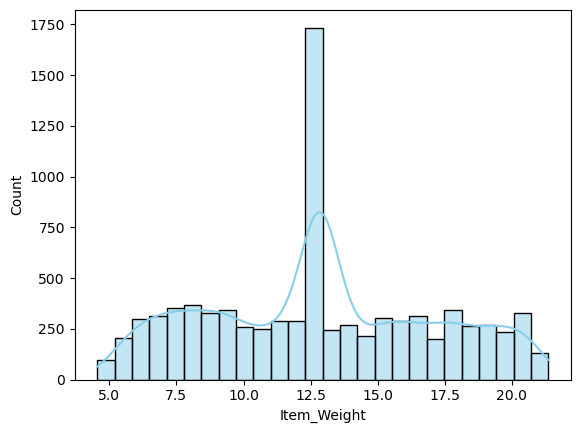

In [28]:
y=df_train["Item_Weight"]
plt.figure()
sns.histplot(y,kde=True,color="skyblue")

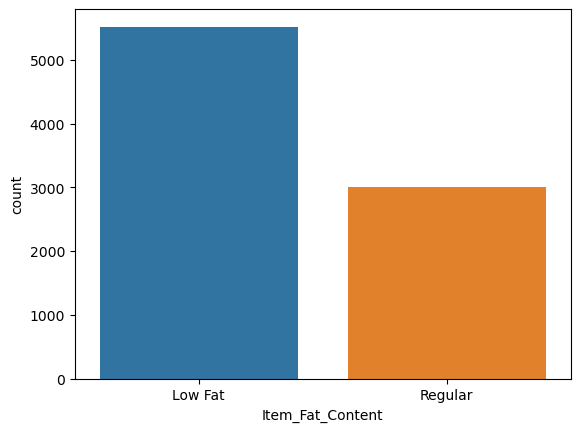

In [29]:
sns.countplot(x='Item_Fat_Content' , data=df_train)
plt.xlabel('Item_Fat_Content')
plt.show()

<Axes: xlabel='Item_Visibility', ylabel='Count'>

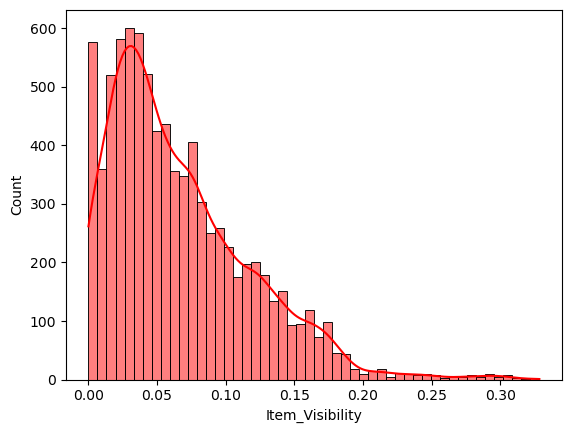

In [30]:
y = df_train['Item_Visibility']
plt.figure() 
sns.histplot(y, kde=True,color = 'red')

<Axes: >

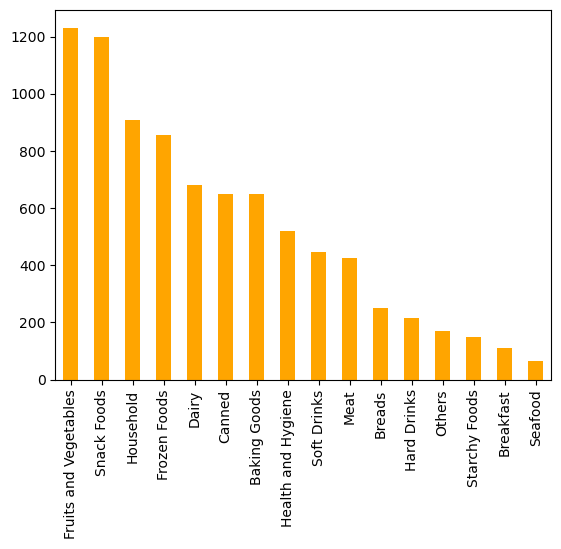

In [31]:
df_train['Item_Type'].value_counts().plot(kind='bar',color = 'orange')

<Axes: xlabel='Item_MRP', ylabel='Count'>

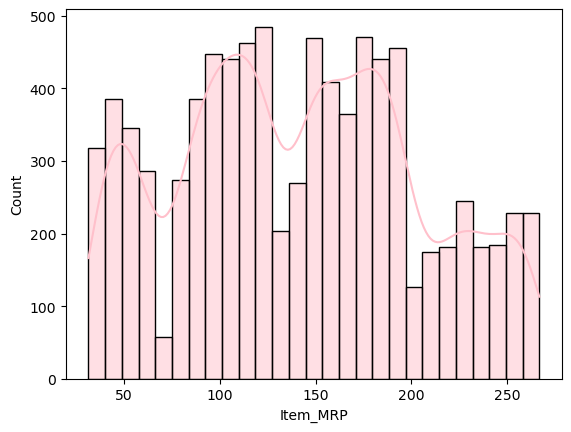

In [32]:
y = df_train['Item_MRP']
plt.figure(1);
sns.histplot(y, kde=True,color = 'pink')

<Axes: xlabel='Outlet_Identifier', ylabel='Count'>

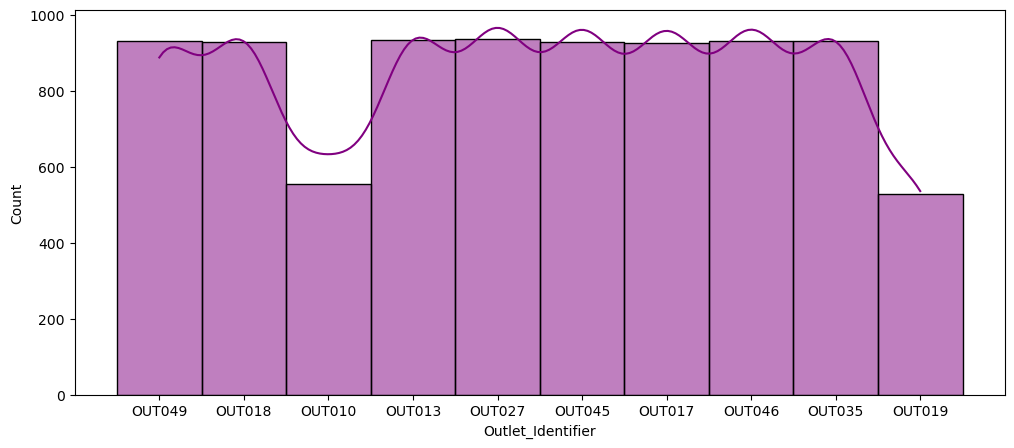

In [33]:
y = df_train['Outlet_Identifier']
plt.figure(figsize=(12,5))
sns.histplot(y, kde=True,color = 'purple')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Count'>

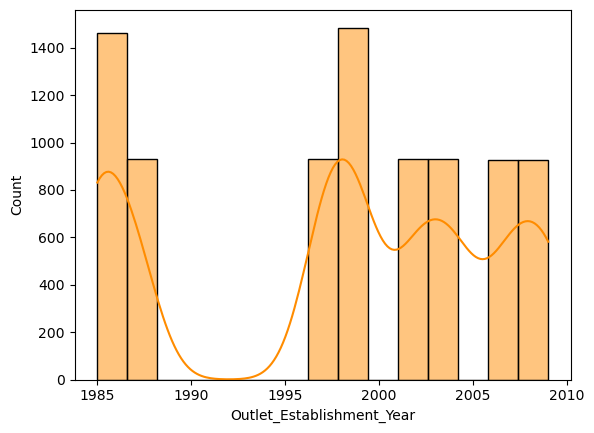

In [34]:
y = df_train['Outlet_Establishment_Year']
sns.histplot(y, kde=True,color = 'darkorange')

<Axes: >

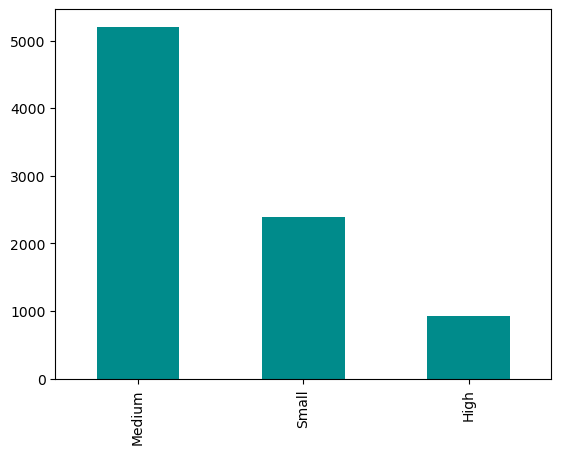

In [35]:
df_train['Outlet_Size'].value_counts().plot(kind='bar',color="darkcyan")

<Axes: >

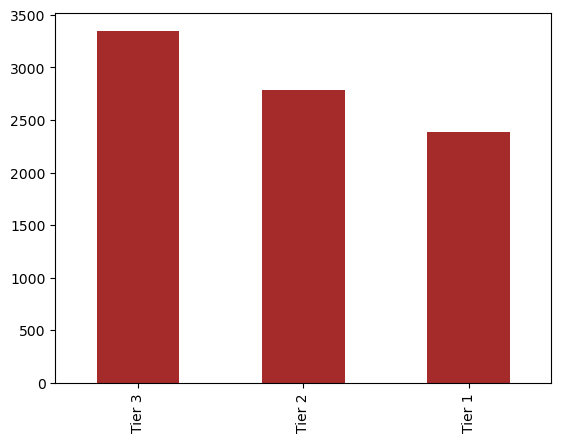

In [36]:
df_train['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'brown')

<Axes: >

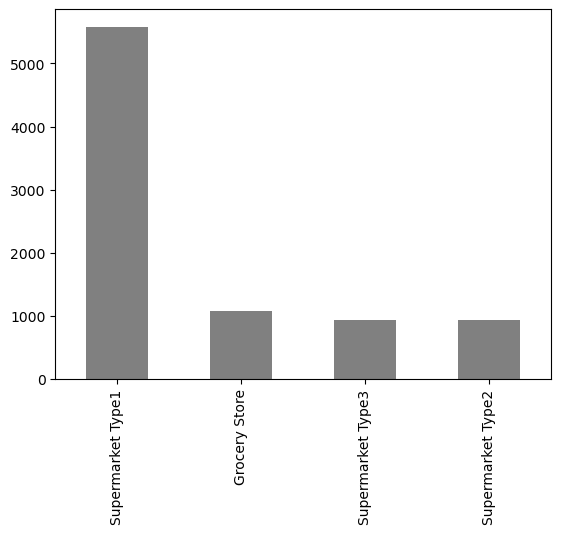

In [37]:
df_train['Outlet_Type'].value_counts().plot(kind='bar',color = 'grey')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

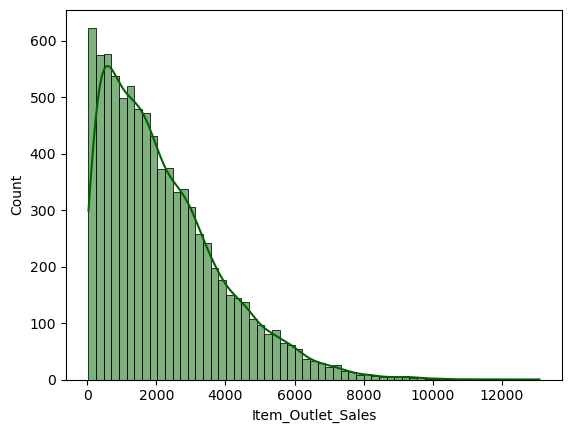

In [38]:
y = df_train['Item_Outlet_Sales']
plt.figure(1);
sns.histplot(y, kde=True,color = 'darkgreen')

<Axes: xlabel='Outlet_Age', ylabel='Count'>

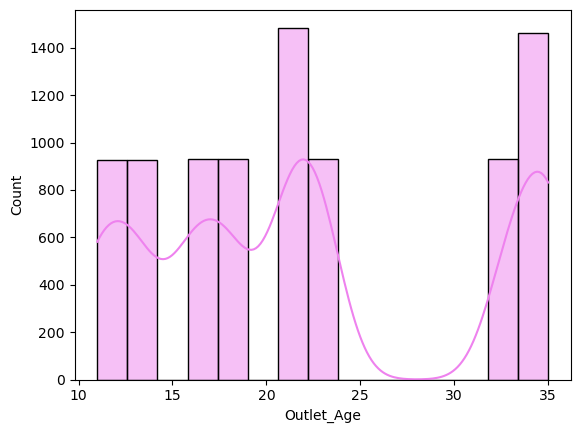

In [39]:
y = df_train['Outlet_Age']
sns.histplot(y, kde=True,color = 'violet')

### UNIVARIATE - Realizations

##  BIVARIATE ANALYSIS

## Numerical Column
##### Since numerical column have lots of unique value, plotting them in a scatter plot will be better.

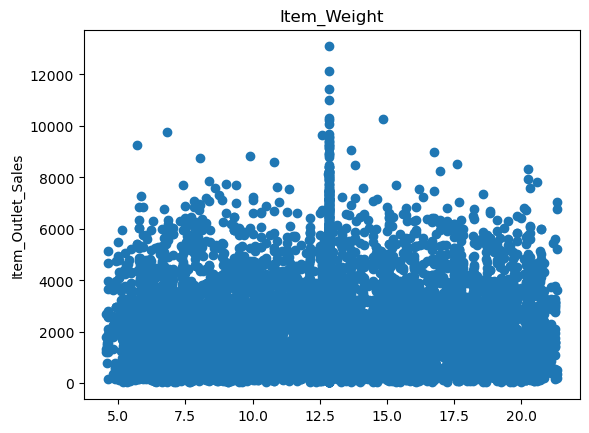

In [40]:
plt.scatter(BM_num["Item_Weight"], BM_num['Item_Outlet_Sales'])
plt.title("Item_Weight")
plt.ylabel('Item_Outlet_Sales')
plt.show()

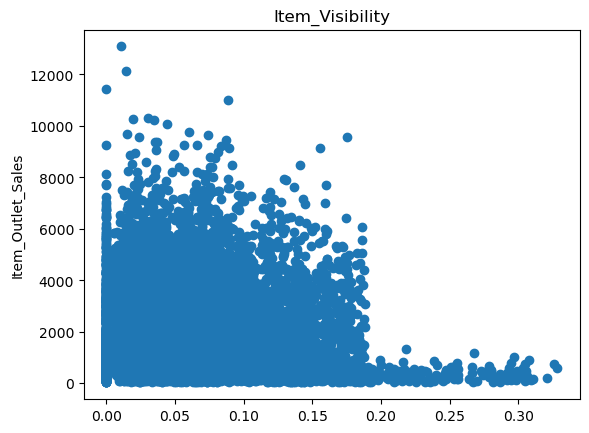

In [41]:
plt.scatter(BM_num["Item_Visibility"], BM_num['Item_Outlet_Sales'])
plt.title("Item_Visibility")
plt.ylabel('Item_Outlet_Sales')
plt.show()

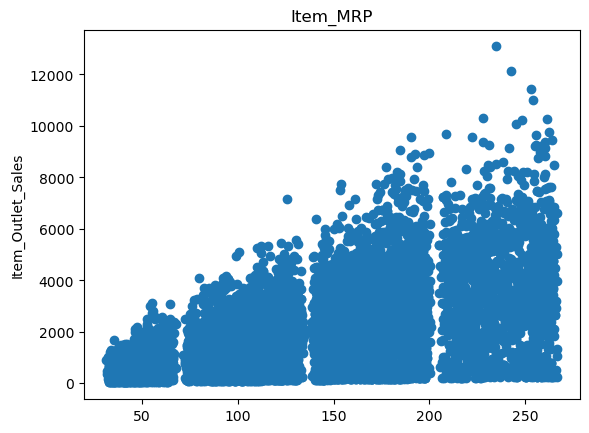

In [42]:
plt.scatter(BM_num["Item_MRP"], BM_num['Item_Outlet_Sales'])
plt.title("Item_MRP")
plt.ylabel('Item_Outlet_Sales')
plt.show()

### BIVARIATE - Numeric columns Realizations

## Categorical Column
#### Let's plot the categorical columns with relation to "Item_Outlet_Sales" 

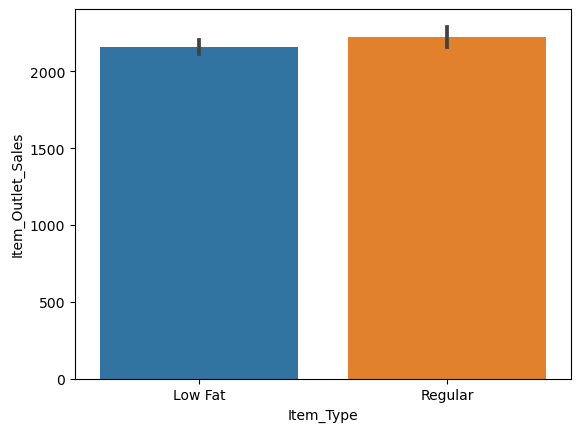

In [43]:
sns.barplot(x='Item_Fat_Content' ,y='Item_Outlet_Sales', data=df_train)
plt.xlabel('Item_Type')
plt.legend
plt.show()

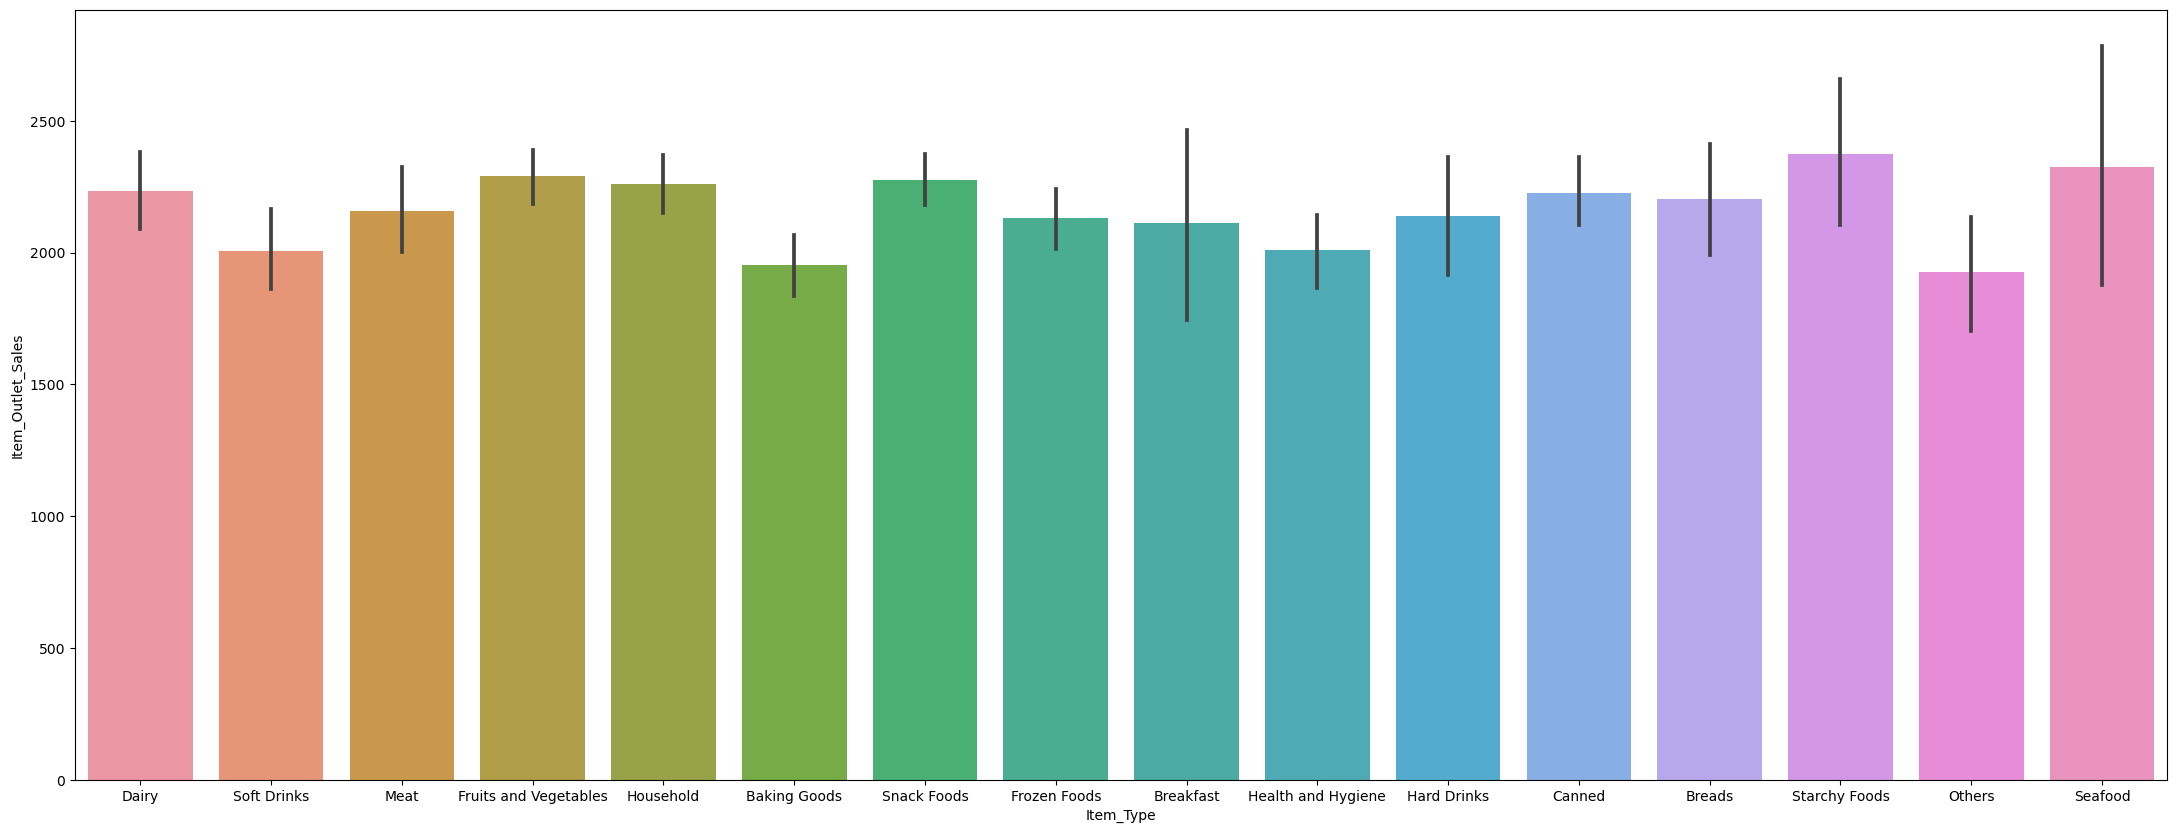

In [44]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=df_train)
plt.xlabel('Item_Type')
plt.legend
plt.show()

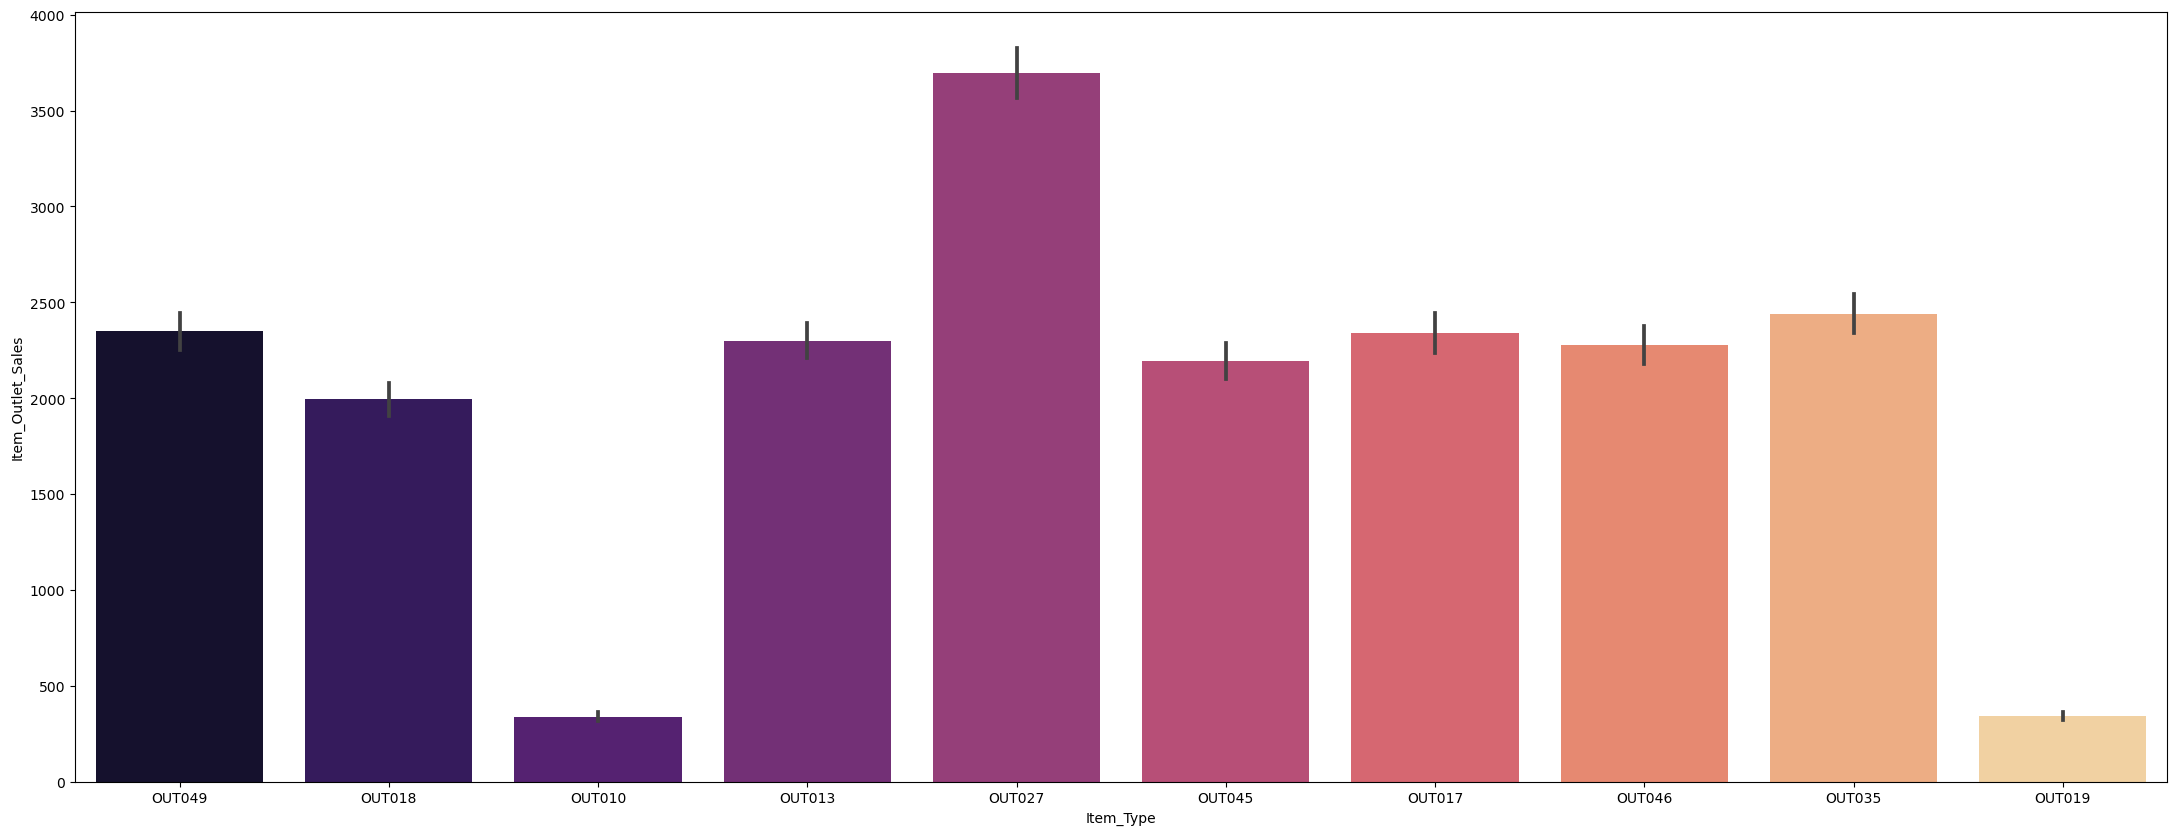

In [45]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=df_train, palette='magma')
plt.xlabel('Item_Type')
plt.legend
plt.show()

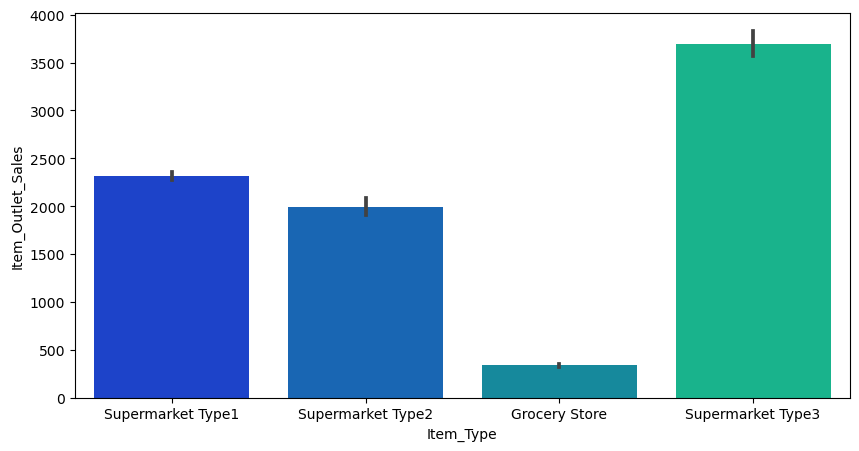

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=df_train, palette='winter')
plt.xlabel('Item_Type')
plt.legend
plt.show()

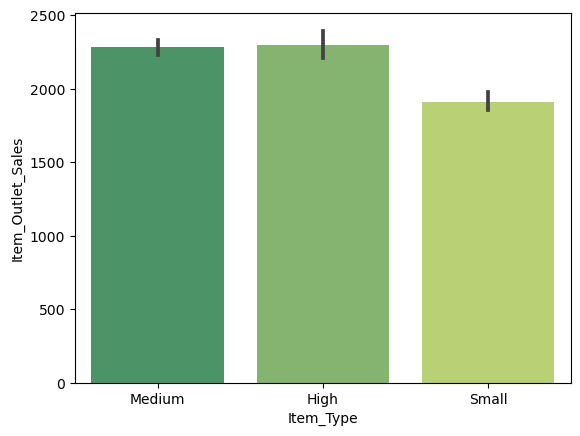

In [47]:
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=df_train, palette='summer')
plt.xlabel('Item_Type')
plt.legend
plt.show()

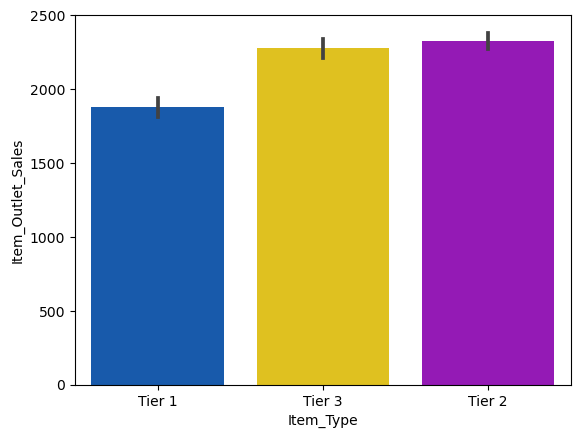

In [48]:
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=df_train, palette='prism')
plt.xlabel('Item_Type')
plt.legend
plt.show()

### BIVARIATE -  Categorical column Realization

## D-Tale

In [49]:
dtale.show(df_train)

## Profile Report

In [50]:
profile = ProfileReport(df_train, title ="ydata Profiling Report")

In [51]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Matrix
#### Displaying the correlation with each column
1. Annotation with positive number indicates positive correlation.
2. Annotation with negative number indicates negative correlation.

C:\Users\Acer\AppData\Local\Temp\ipykernel_19984\1056970078.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

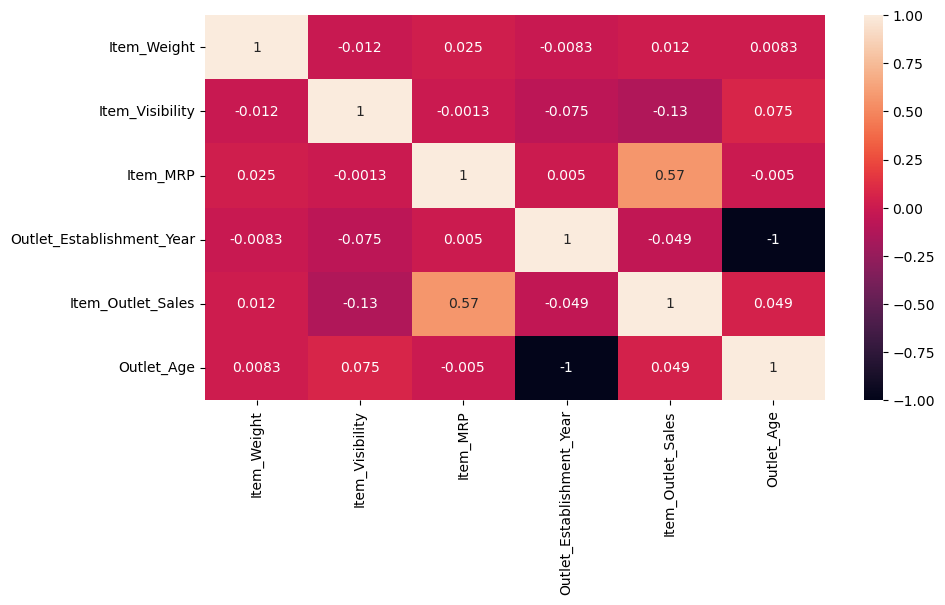

In [52]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)

## Categorical Data Ploting (using Klib)

GridSpec(6, 7)

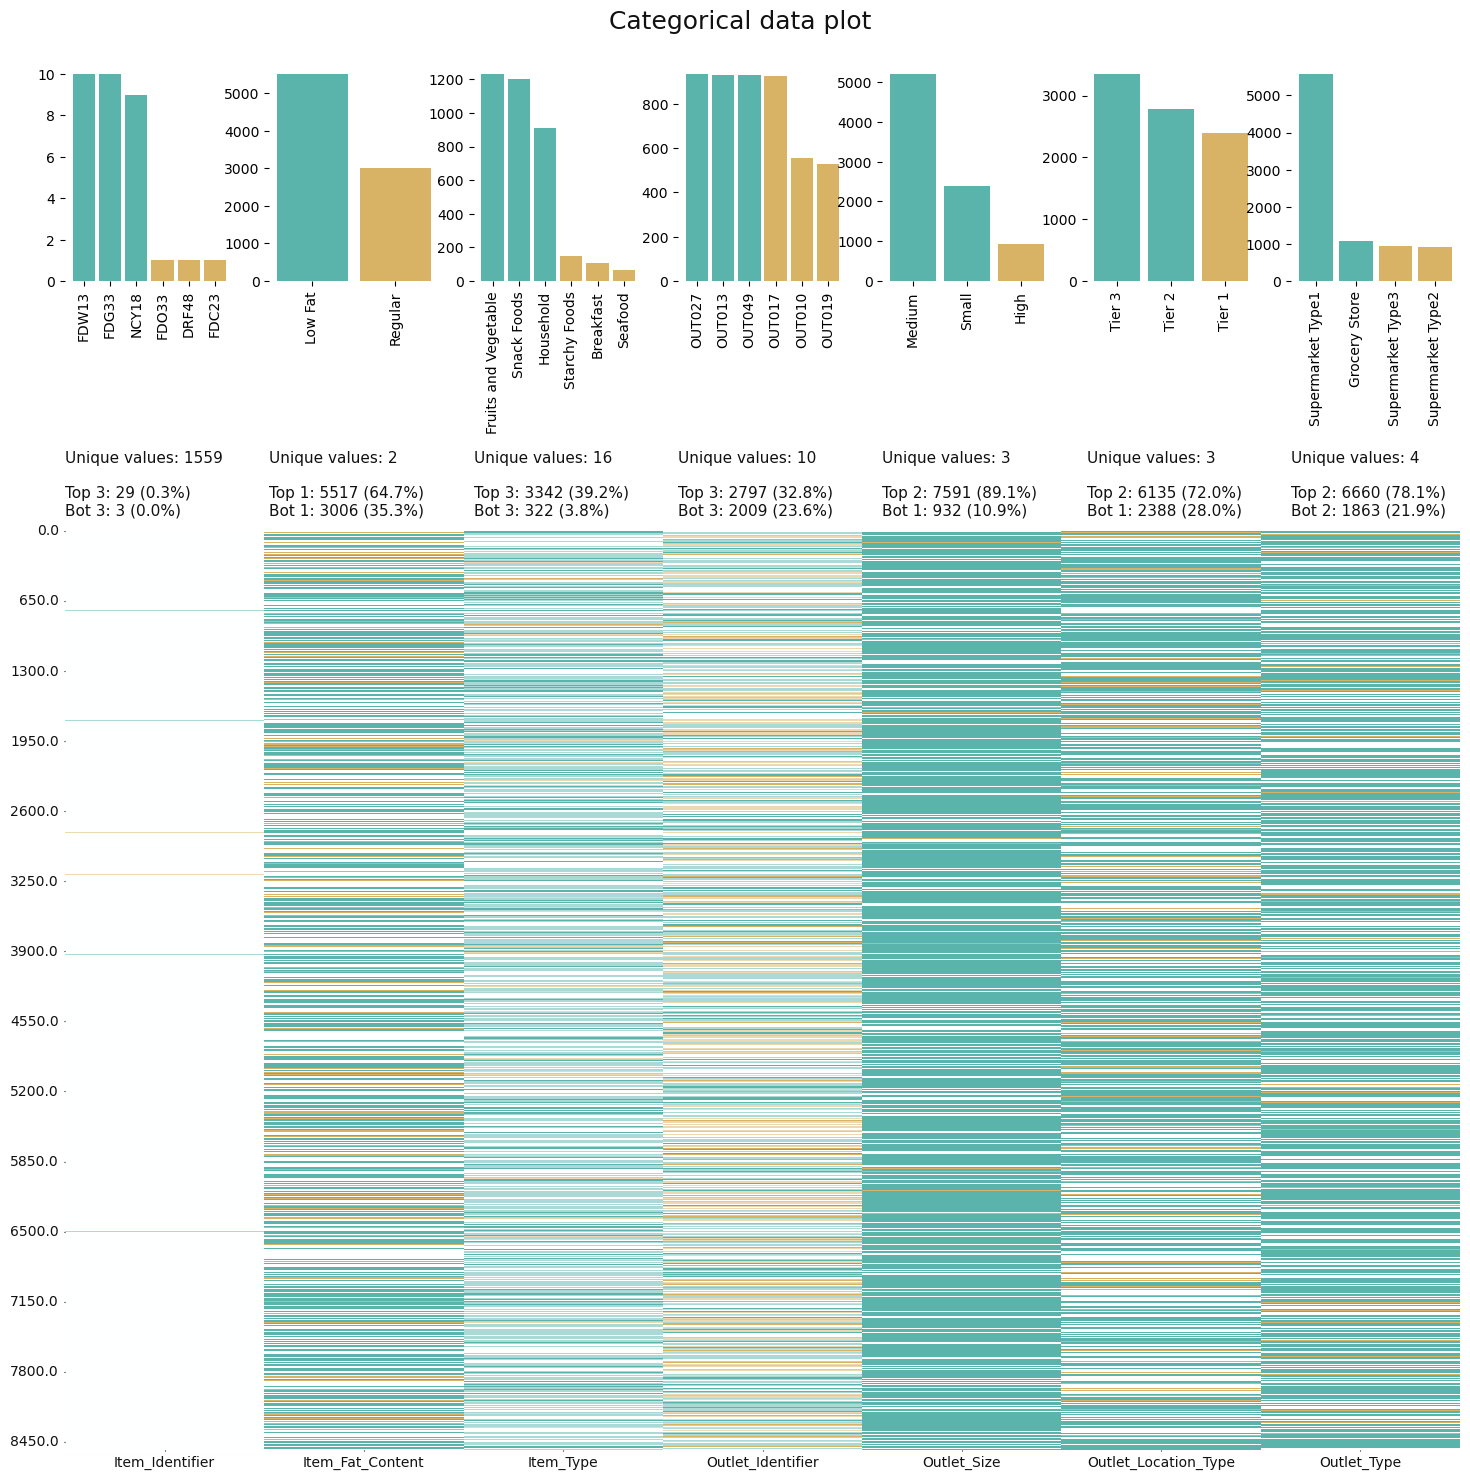

In [53]:
klib.cat_plot(df_train)

In [54]:
klib.corr_mat(df_train)

# FEATURE ENGINEERING
Let's divide the columns into "Ordinal variables" and "Nominal variables"

### Ordinal variables:
1. Item_Fat_Content
2. Outlet_Size
3. Outlet_Location_Type


### Nominal variables:

1. Item_Identifier
2. Item_Type
3. Outlet_Identifier
4. Outlet_Type

### Process:
1. These ordinal values contains 'object' which needs to be converted into 'int64'
2. As mentioned earlier "Outlet_Establishment_Year" is useless, Let's drop it.
3. 'Item_Identifier' and 'Outlet_Identifier' don't have significant values so let's drop them.
4. 'Outlet_Type' and 'Item_Type will' be One Hot encoded.

#### Checking the number of unique values in each column

In [55]:
cat = df_train.select_dtypes('object').columns.to_list()
BM_cat = df_train[cat]

In [56]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [57]:
#Label Encoding
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

df_train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 0         0.016047   
1              DRC01        5.920                 1         0.019278   
2              FDN15       17.500                 0         0.016760   
3              FDX07       19.200                 1         0.000000   
4              NCD19        8.930                 0         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 0         0.056783   
8519           FDS36        8.380                 1         0.046982   
8520           NCJ29       10.600                 0         0.035186   
8521           FDN46        7.210                 1         0.145221   
8522           DRG01       14.800                 0         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0     Supermarket Type1          3735.1380          21  
1     Supermarket Type2           443.4228          11  
2     Supermarket Type1          2097.2700          21  
3         Grocery Store           732.3800          22  
4     Supermarket Type1           994.7052          33  
...                 ...                ...         ...  
8518  Supermarket Type1          2778.3834          33  
8519  Supermarket Type1           549.2850          18  
8520  Supermarket Type1          1193.1136          16  
8521  Supermarket Type2          1845.5976          11  
8522  Supermarket Type1           765.6700          23  

[8523 rows x 13 columns]

In [58]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df_train[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df_test[cols])).astype('int64')

#get feature names for each columns
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# Let's put back the removed index
tr_oh.index = df_train.index
te_oh.index = df_test.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (fe = feature engeenired)
tr_fe = pd.concat([df_train, tr_oh], axis=1)
te_fe = pd.concat([df_test, te_oh], axis=1)

In [59]:
df_train

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 0         0.016047   
1              DRC01        5.920                 1         0.019278   
2              FDN15       17.500                 0         0.016760   
3              FDX07       19.200                 1         0.000000   
4              NCD19        8.930                 0         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 0         0.056783   
8519           FDS36        8.380                 1         0.046982   
8520           NCJ29       10.600                 0         0.035186   
8521           FDN46        7.210                 1         0.145221   
8522           DRG01       14.800                 0         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

            Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0     Supermarket Type1          3735.1380          21  
1     Supermarket Type2           443.4228          11  
2     Supermarket Type1          2097.2700          21  
3         Grocery Store           732.3800          22  
4     Supermarket Type1           994.7052          33  
...                 ...                ...         ...  
8518  Supermarket Type1          2778.3834          33  
8519  Supermarket Type1           549.2850          18  
8520  Supermarket Type1          1193.1136          16  
8521  Supermarket Type2          1845.5976          11  
8522  Supermarket Type1           765.6700          23  

[8523 rows x 13 columns]

In [60]:
tr_fe.head(25)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0            FDA15     9.300000                 0         0.016047   
1            DRC01     5.920000                 1         0.019278   
2            FDN15    17.500000                 0         0.016760   
3            FDX07    19.200000                 1         0.000000   
4            NCD19     8.930000                 0         0.000000   
5            FDP36    10.395000                 1         0.000000   
6            FDO10    13.650000                 1         0.012741   
7            FDP10    12.857645                 0         0.127470   
8            FDH17    16.200000                 1         0.016687   
9            FDU28    19.200000                 1         0.094450   
10           FDY07    11.800000                 0         0.000000   
11           FDA03    18.500000                 1         0.045464   
12           FDX32    15.100000                 1         0.100014   
13           FDS46    17.600000                 1         0.047257   
14           FDF32    16.350000                 0         0.068024   
15           FDP49     9.000000                 1         0.069089   
16           NCB42    11.800000                 0         0.008596   
17           FDP49     9.000000                 1         0.069196   
18           DRI11    12.857645                 0         0.034238   
19           FDU02    13.350000                 0         0.102492   
20           FDN22    18.850000                 1         0.138190   
21           FDW12    12.857645                 1         0.035400   
22           NCB30    14.600000                 0         0.025698   
23           FDC37    12.857645                 0         0.057557   
24           FDR28    13.850000                 1         0.025896   

                Item_Type  Item_MRP Outlet_Identifier  \
0                   Dairy  249.8092            OUT049   
1             Soft Drinks   48.2692            OUT018   
2                    Meat  141.6180            OUT049   
3   Fruits and Vegetables  182.0950            OUT010   
4               Household   53.8614            OUT013   
5            Baking Goods   51.4008            OUT018   
6             Snack Foods   57.6588            OUT013   
7             Snack Foods  107.7622            OUT027   
8            Frozen Foods   96.9726            OUT045   
9            Frozen Foods  187.8214            OUT017   
10  Fruits and Vegetables   45.5402            OUT049   
11                  Dairy  144.1102            OUT046   
12  Fruits and Vegetables  145.4786            OUT049   
13            Snack Foods  119.6782            OUT046   
14  Fruits and Vegetables  196.4426            OUT013   
15              Breakfast   56.3614            OUT046   
16     Health and Hygiene  115.3492            OUT018   
17              Breakfast   54.3614            OUT049   
18            Hard Drinks  113.2834            OUT027   
19                  Dairy  230.5352            OUT035   
20            Snack Foods  250.8724            OUT013   
21           Baking Goods  144.5444            OUT027   
22              Household  196.5084            OUT035   
23           Baking Goods  107.6938            OUT019   
24           Frozen Foods  165.0210            OUT046   

    Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  ...  \
0                        1999            1                     0  ...   
1                        2009            1                     2  ...   
2                        1999            1                     0  ...   
3                        1998            1                     2  ...   
4                        1987            0                     2  ...   
5                        2009            1                     2  ...   
6                        1987            0                     2  ...   
7                        1985            1                     2  ...   
8                        2002            1

In [61]:
# Dropping irrelevant columns

tr_fe = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [62]:
tr_fe.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0         9.30                 0         0.016047  249.8092            1   
1         5.92                 1         0.019278   48.2692            1   
2        17.50                 0         0.016760  141.6180            1   
3        19.20                 1         0.000000  182.0950            1   
4         8.93                 0         0.000000   53.8614            0   

   Outlet_Location_Type  Item_Outlet_Sales  Outlet_Age  \
0                     0          3735.1380          21   
1                     2           443.4228          11   
2                     0          2097.2700          21   
3                     2           732.3800          22   
4                     2           994.7052          33   

   Item_Type_Baking Goods  Item_Type_Breads  ...  Item_Type_Meat  \
0                       0                 0  ...               0   
1                       0                 0  ...               0   
2                       0                 0  ...               1   
3                       0                 0  ...               0   
4                       0                 0  ...               0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0                 0                  0                      0   
1                 0                  0                      0   
2                 0                  0                      0   
3                 0                  0                      0   
4                 0                  0                      0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                      0                        0                          0   
1                      1                        0                          0   
2                      0                        0                          0   
3                      0                        0                          1   
4                      0                        0                          0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 28 columns]

# MODELING
#### In this project we will be using three modeling:
1. Linear Regression
2. Random Forest Regressor
3. XG Boost Regressor

#### Score Metrics for Regression:
Mean Absolute Error (MAE) - Mean of the absolute value of errors (absolute distance from true value): 

Mean Squared Error (MSE) - Mean of the squared value of errors (squared distance from true value): 

R^2 (coefficient of determination) - Regression score function.:

In [63]:
# Let's do train_test_split
y = tr_fe['Item_Outlet_Sales']
x = tr_fe.drop('Item_Outlet_Sales', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y)


In [64]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 27) (6392, 27) (2131, 27)


In [65]:
def cross_val(model_name,model,x,y,cv):

    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Linear Regression

In [66]:
#model
lr = LinearRegression()

#fit
lr.fit(x_train, y_train)

#predict
y_predict = lr.predict(x_test)

#score variables
lr_MAE = round(MAE(y_test, y_predict),2)
lr_MSE = round(MSE(y_test, y_predict),2)
lr_R2 = round(R2(y_test, y_predict),4)
lr_CS  = round(CVS(lr, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {lr_MAE}\n")
print(f" Mean Squared Error: {lr_MSE}\n")
print(f" R^2 Score: {lr_R2}\n")
cross_val(lr,LinearRegression(),x,y,5)

 Mean Absolute Error: 830.78

 Mean Squared Error: 1250497.95

 R^2 Score: 0.5584

LinearRegression() Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression() score: 0.558


## Random Forest Regressor

In [67]:
rfr= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
rfr.fit(x_train, y_train)
#predict
y_predict = rfr.predict(x_test)

#score variables
rfr_MAE = round(MAE(y_test, y_predict),2)
rfr_MSE = round(MSE(y_test, y_predict),2)
rfr_R2 = round(R2(y_test, y_predict),4)
rfr_CS  = round(CVS(rfr, x, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {rfr_MAE}\n")
print(f" Mean Squared Error: {rfr_MSE}\n")
print(f" R^2 Score: {rfr_R2}\n")
cross_val(rfr,RandomForestRegressor(),x,y,5)

 Mean Absolute Error: 752.93

 Mean Squared Error: 1144019.21

 R^2 Score: 0.596

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.53
0.53
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5474


In [68]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")

In [69]:
Random_Forest_Regressor

y_test   prediction
5686   856.8846  1560.731155
8319  4210.5192  3878.878407
519   5344.3766  5652.464826
7563  1098.5700  1197.598457
4531   865.5400   691.894112
...         ...          ...
3536  5452.9020  3631.028344
3799  1060.6194  1897.637770
7849   567.2616  3061.513718
8364  3355.6320  2794.486803
8140   623.1888   862.917722

[2131 rows x 2 columns]

## XG Boost Regressor

In [70]:
xg = XGBRegressor()

# Fit
xg.fit(x_train, y_train)

# Predict
y_predict = xg.predict(x_test)

# Score variables
xg_MAE = round(MAE(y_test, y_predict), 2)
xg_MSE = round(MSE(y_test, y_predict), 2)
xg_R2 = round(R2(y_test, y_predict), 4)
xg_CS = round(CVS(xg, x, y, cv=5).mean(), 4)

print(f"Mean Absolute Error: {xg_MAE}\n")
print(f"Mean Squared Error: {xg_MSE}\n")
print(f"R^2 Score: {xg_R2}\n")
cross_val(xg, XGBRegressor(), x, y, 5)

Mean Absolute Error: 817.34

Mean Squared Error: 1345565.43

R^2 Score: 0.5248

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.51
0.49
0.52
0.55
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsa

# CONCLUSION

In [71]:
MAE= [lr_MAE,rfr_MAE,xg_MAE]
MSE= [lr_MSE,rfr_MSE,xg_MSE]
R2= [lr_R2,rfr_R2,xg_R2]
Cross_score= [lr_CS,rfr_CS,xg_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","XG Boost Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R2, 'Cross Validation Score':Cross_score})
Models

models     MAE         MSE     R^2  Cross Validation Score
0        Linear Regression  830.78  1250497.95  0.5584                   0.558
1  Random Forest Regressor  752.93  1144019.21  0.5960                   0.592
2       XG Boost Regressor  817.34  1345565.43  0.5248                   0.523

# SUMMARY

### Model Insights:
1. Linear Regression:  Linear Regression performs well, with the second-lowest MAE and MSE. It also has a respectable R^2 score, indicating its effectiveness in explaining variance in sales.

2. Random Forest Regressor: The Random Forest Regressor outperforms both Linear Regression and XG Boost Regressor across all evaluation metrics. It achieves the lowest MAE and MSE, indicating better accuracy in predicting sales. Additionally, it has the highest R^2 score, suggesting a better overall fit to the data.

3. XG Boost Regressor: XG Boost Regressor lags behind the other two models in terms of MAE, MSE, and R^2 score. While it is a capable algorithm, it doesn't perform as strongly in this particular analysis.

### Key Influencers for increasing sales:
1. Item Visiblity - Higher product visibility in stores is a crucial factor that contributes to increased sales. Ensuring that products are prominently displayed can lead to better sales performance.
2. Item MRP - The price range of products, especially offering mid-priced items, is essential. Most sales occur within the price range of 90-200, indicating the importance of pricing strategies in attracting customers.

### Hypothesis Testing:
I have used the realizations and findings from univariate and bivariate analyses as a basis for conducting hypothesis testing.
1. #### Hypothesis 1 - Item Visibility Impact:
Higher product visibility is associated with increased sales. Alternative Hypothesis (H1) is TRUE

2. #### Hypothesis 2 - Item Pricing Impact:
Most items sold are between the price range of '90-200', Items with higher MRP tend to sell better in most cases. Alternative Hypothesis (H1) is TRUE.

3. #### Hypothesis 3 - Store Type Impact:
The type of the store matters. 'Supermarket Type1' generates the highest sales and should be a focused for maximizing revenue. Alternative Hypothesis (H1) is TRUE.